In [ ]:
import itertools
import random
from collections import defaultdict
import pandas as pd
import json
import torch.nn as nn
# Your existing shape functions
def is_funnel(geometry):
    return all(geometry[i] <= geometry[i + 1] for i in range(len(geometry) - 1)) and not all(geometry[i] == geometry[i + 1] for i in range(len(geometry) - 1))


def is_diamond(geometry):
    if len(geometry) < 3:
        return False
    tail = geometry[-3:]
    mid = 1
    return tail[0] < tail[mid] and tail[2] < tail[mid]


def is_rectangle(geometry):
    return all(geometry[i] == geometry[i + 1] for i in range(len(geometry) - 1))


def is_bottleneck(geometry):
    return all(geometry[i] >= geometry[i + 1] for i in range(len(geometry) - 1)) and not all(geometry[i] == geometry[i + 1] for i in range(len(geometry) - 1))

def is_bowtie(geometry):
    if len(geometry) < 3:
        return False
    tail = geometry[-3:]
    mid = 1
    return tail[0] > tail[mid] and tail[2] > tail[mid]

# Generate configurations
import random
def generate_configurations(max_number_nr=256, number_l=3, activations=None, shape=None):
    if activations is None:
        activations = ["ReLU", "Tanh", "Sigmoid"]

    configurations = []
    geometries = []
    neurons = [16 * (2 ** i) for i in range(int(max_number_nr / 16 -1).bit_length() )]
    #print(neurons)
    all_architectures = itertools.product(neurons, repeat=number_l)
    for arch in all_architectures:
     #   print(arch)
        if sum(arch) <= max_number_nr+1 and shape(arch):
            geometries.append(arch)

    activation_combinations = list(itertools.product(activations, repeat=number_l))
    for geometry in geometries:
        for activation_set in activation_combinations:
            print(len(activation_combinations))
            configurations.append({
                "layers": [[activation_set[i],geometry[i]] for i in range (len(geometry))],
                "total_neurons": sum(geometry),
                "shape": shape.__name__.replace("is_", "")
            })

    random.shuffle(configurations)
    return configurations

# Round-robin sampling
from collections import defaultdict
import random

def round_robin_sampling(configurations, N):
    """
    Perform round-robin sampling from configurations, ensuring the same number of samples
    is taken from each class (shape) until N configurations are selected.

    Args:
        configurations (list): List of configurations with a "shape" key.
        N (int): Total number of configurations to sample.

    Returns:
        list: Sampled configurations.
    """
    # Group configurations by shape
    grouped_by_shape = defaultdict(list)
    for config in configurations:
        grouped_by_shape[config["shape"]].append(config)

    # Shuffle each group to ensure randomness
    for shape in grouped_by_shape:
        random.shuffle(grouped_by_shape[shape])

    # Determine equal number of samples per class
    num_classes = len(grouped_by_shape)
    samples_per_class = N // num_classes
    remaining_samples = N % num_classes

    sampled_configs = []

    # Sample an equal number from each class
    for shape, configs in grouped_by_shape.items():
        sampled_configs.extend(configs[:samples_per_class])
        grouped_by_shape[shape] = configs[samples_per_class:]

    # Distribute remaining samples (if any) across classes
    if remaining_samples > 0:
        for shape in random.sample(list(grouped_by_shape.keys()), remaining_samples):
            if grouped_by_shape[shape]:
                sampled_configs.append(grouped_by_shape[shape].pop(0))

    return sampled_configs

activation_map = {
    "ReLU": nn.ReLU,
    "Tanh": nn.Tanh,
    "Sigmoid": nn.Sigmoid,
    "LeakyReLU": nn.LeakyReLU,
    "ELU": nn.ELU,
    "SiLU": nn.SiLU ,

    # SiLU is also known as Swish
}

# Create model zoo
def create_model_zoo():
    max_number_nr = 256
    number_l = 3
    N = 25
    activations = list(activation_map.keys())

    shape_functions = shape_functions = [is_funnel,  is_rectangle, is_bottleneck,is_bowtie,is_diamond]
    all_models = []

    for shape in shape_functions:

        configurations = generate_configurations(
            max_number_nr=max_number_nr,
            number_l=number_l,
            activations=activations,
            shape=shape
        )
        sampled_configs = round_robin_sampling(configurations, N)
        all_models.extend(sampled_configs)

    shape_functions = [is_funnel,  is_rectangle, is_bottleneck]

    for shape in shape_functions:
        configurations = generate_configurations(
            max_number_nr=max_number_nr,
            number_l=2,
            activations=activations,
            shape=shape
        )
        sampled_configs = round_robin_sampling(configurations, N)
        all_models.extend(sampled_configs)

    model_zoo = pd.DataFrame([
        {
            "id": idx,
             "layers": config["layers"],
            "total_neurons": config["total_neurons"],
            "shape": config["shape"]
        }
        for idx, config in enumerate(all_models)
    ])

    model_zoo.to_csv("Problem_A/model_zoo.csv", index=False)
    print(f"Model zoo saved with {len(all_models)} models!")
    return model_zoo

# Generate and save the model zoo
create_model_zoo()




216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


,id,layers,total_neurons,shape
0,0,"[[LeakyReLU, 16], [Sigmoid, 16], [LeakyReLU, 32]]",64,funnel
1,1,"[[Tanh, 32], [LeakyReLU, 32], [LeakyReLU, 128]]",192,funnel
2,2,"[[SiLU, 32], [ReLU, 32], [SiLU, 64]]",128,funnel
3,3,"[[ELU, 16], [ReLU, 16], [LeakyReLU, 64]]",96,funnel
4,4,"[[Sigmoid, 32], [ELU, 32], [SiLU, 128]]",192,funnel
...,...,...,...,...
195,195,"[[Tanh, 64], [ReLU, 16]]",80,bottleneck
196,196,"[[Sigmoid, 32], [Sigmoid, 16]]",48,bottleneck
197,197,"[[ELU, 128], [SiLU, 32]]",160,bottleneck
198,198,"[[Tanh, 128], [SiLU, 16]]",144,bottleneck


216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


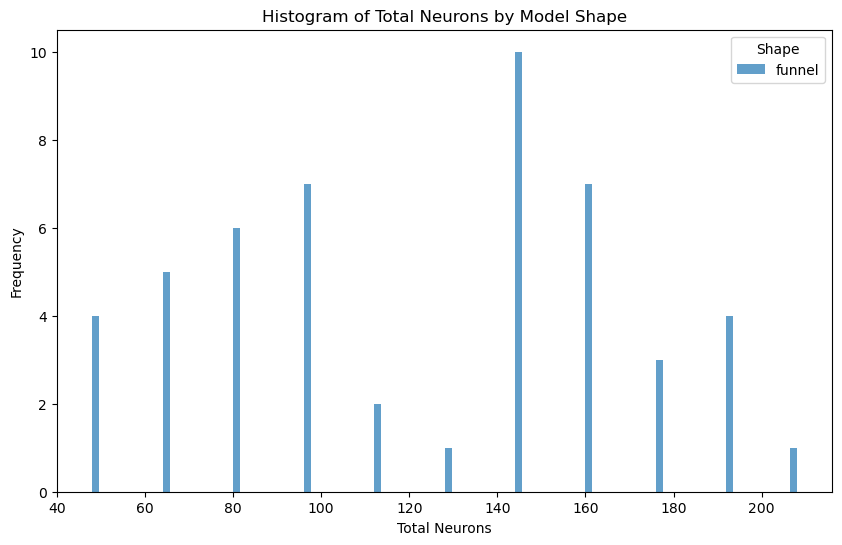

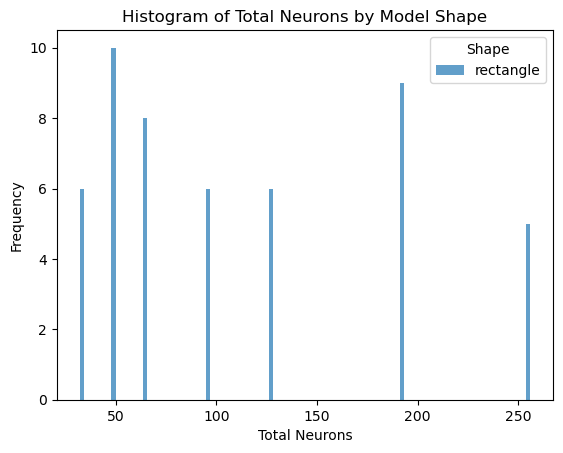

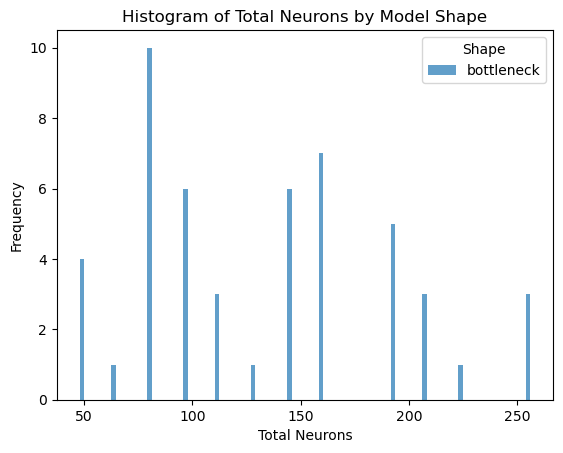

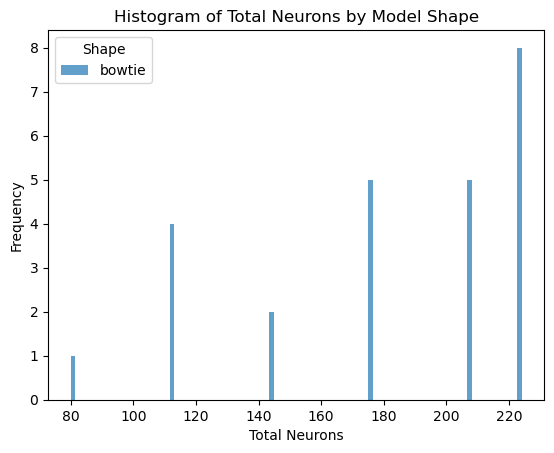

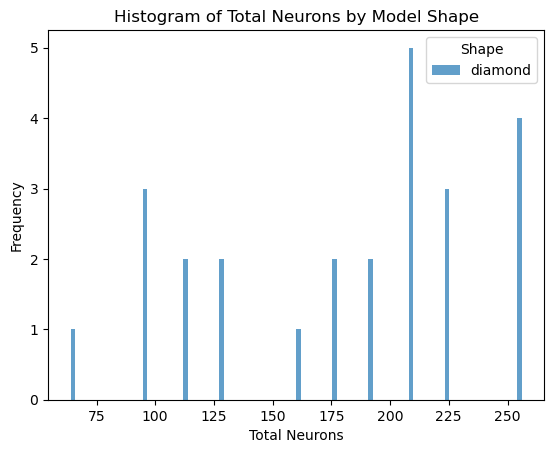

In [2]:
import matplotlib.pyplot as plt
import pandas as pd



# Load model data into a DataFrame
df = create_model_zoo()

# Plot: Histogram of Total Neurons by Shape
plt.figure(figsize=(10, 6))

# Use a histogram to group total neurons by shape
for shape in df['shape'].unique():
    shape_data = df[df['shape'] == shape]['total_neurons']
    plt.hist(shape_data, bins=100, alpha=0.7, label=shape)

    plt.xlabel('Total Neurons')
    plt.ylabel('Frequency')
    plt.title('Histogram of Total Neurons by Model Shape')
    plt.legend(title='Shape')
    plt.show()

